# **Group-26 Data Minng Project**

## Title: Personal Email Categorizer

## Team Members:

*Naga Venkata Kanakalakshmi - 11725119, nagavenkatakanakalmurikipudi@my.unt.edu*

*Karthik Rachamalli - 11149091, karthikrachamalli@my.unt.edu*

*Vishnu Sudireddy - 11642773, vishnusudireddy@my.unt.edu*

## 1. Data Loading

In [ ]:
#imports
import pandas as pd_g26
import numpy as npy_g26

import matplotlib.pyplot as mtplt_g26
import seaborn as sbrn_g26

#Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

#Data Pre-Processing Libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

#Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Training and Testing the data
from sklearn.model_selection import train_test_split

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

#Performance Metrics
from sklearn.metrics import accuracy_score as accuracy_score_g26, precision_score as precision_score_g26, recall_score as recall_score_g26, f1_score as f1_score_g26

#cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_score, StratifiedKFold

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

#SVM
from sklearn.svm import SVC as svc_classifier

#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

#Cross Validation
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC



In [ ]:
# creating dataframe for email dataset
email_df = pd_g26.read_csv("/content/personal_emails.csv")

#Display the top 15 records of dataframe
print("The top 15 records of dataframe:")
email_df.head(15)

The top 15 records of dataframe:


,EmailNo,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,predictionclass
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Display the shape of the email dataframe
print("shape of the email dataframe: ",email_df.shape)

shape of the email dataframe:  (5172, 3002)


In [ ]:
# Displaying the features of the dataset
print("Features of the dataset: ", email_df.columns)

print("\n Target Variables of the dataset:", email_df['predictionclass'].unique())

Features of the dataset:  Index(['EmailNo', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'predictionclass'],
      dtype='object', length=3002)

 Target Variables of the dataset: [0 1 2]


## 2. Exploratory Data Analysis

In [ ]:
#Count the values in the predictionclass (target data)
target_data = email_df['predictionclass'].value_counts()
print(target_data)

predictionclass
0    3604
1    1471
2      97
Name: count, dtype: int64


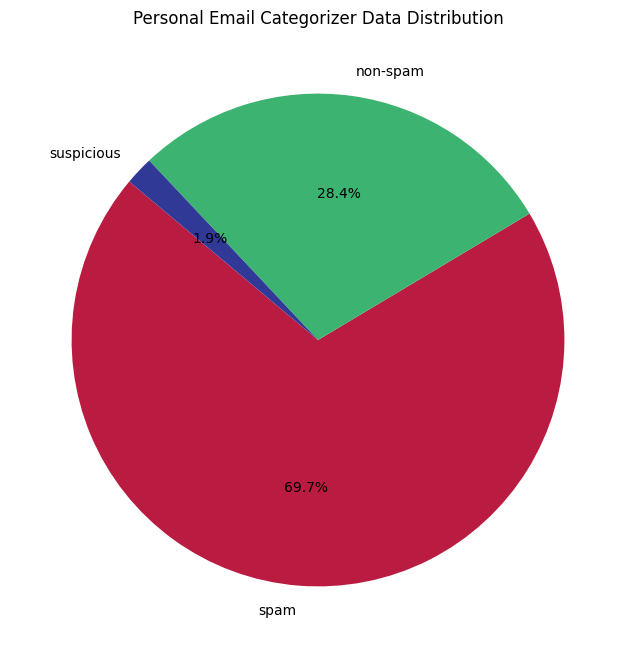

In [ ]:
# Mapping target data values
target_data = email_df['predictionclass']

# mapping target values with its original names
new_categories_mapping = {
    0: 'spam',
    1: 'non-spam',
    2: "suspicious"
}

category_classifying_colors = ['#ba1c41', '#3CB371', '#303a96']

# substitute email categories for respective numerical values
email_categories = target_data.map(new_categories_mapping)

# the number of instances of each email category
email_categories_count = email_categories.value_counts()

# Computeing the each category percentage
each_email_category_percentage = (email_categories_count / email_categories_count.sum()) * 100

# Email data distribution
mtplt_g26.figure(figsize=(8, 8))
mtplt_g26.pie(each_email_category_percentage, labels=each_email_category_percentage.index, autopct='%1.1f%%', startangle=140, colors=category_classifying_colors)
mtplt_g26.title('Personal Email Categorizer Data Distribution')
mtplt_g26.show()

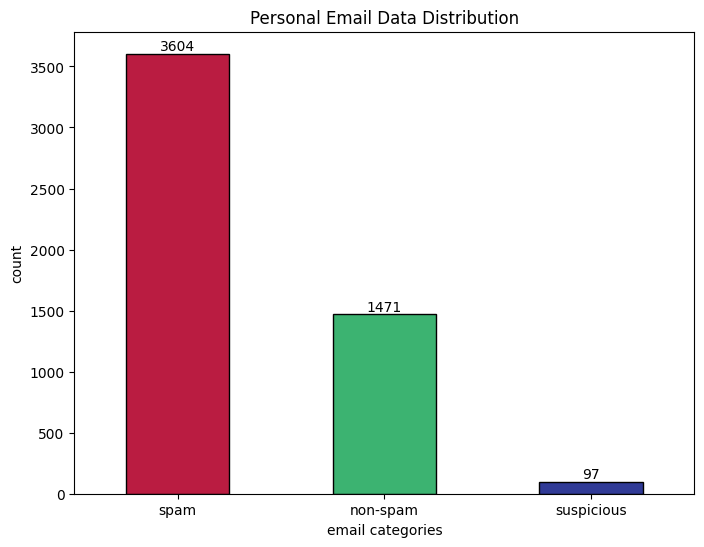

In [ ]:
# Data Ditribution using Barplot

category_classifying_colors = ['#ba1c41', '#3CB371', '#303a96']

mtplt_g26.figure(figsize=(8, 6))
bars = email_categories_count.plot(kind='bar', color=category_classifying_colors)

for bar in bars.patches:
    bar.set_edgecolor('black')

for bar in bars.patches:
    mtplt_g26.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')

mtplt_g26.title('Personal Email Data Distribution')
mtplt_g26.xlabel('email categories')
mtplt_g26.ylabel('count')

mtplt_g26.xticks(rotation=360)

mtplt_g26.show()

## 3. Data Pre-Processing

### 3.1 Handling NULL Values

In [ ]:
# count of the null values in email dataset
null_values_count = email_df.isnull().sum()

# display the null values for each feature
print("NUll values in each feature:")
print(null_values_count)

NUll values in each feature:
EmailNo            0
the                0
to                 0
ect                0
and                0
                  ..
military           0
allowing           0
ff                 0
dry                0
predictionclass    0
Length: 3002, dtype: int64


### 3.2 Identify the Outliers

In [ ]:
# Get the features of the data set
email_dataset_features = email_df.iloc[:, 1:]

# Step 1: Dimensionality Reduction
pca_instance = PCA(n_components=100)
reduced_data_set = pca_instance.fit_transform(email_dataset_features)

# Step 2: Outlier Detection with Isolation Forest
isolation_forest_instance = IsolationForest()
outliers_count = isolation_forest_instance.fit_predict(reduced_data_set)

# Identify the outliers
outliers = email_df.iloc[npy_g26.where(outliers_count == -1)]

# Dispaly the outliers data
print("outliers in the email dataset:", outliers.shape[0])


outliers in the email dataset: 418


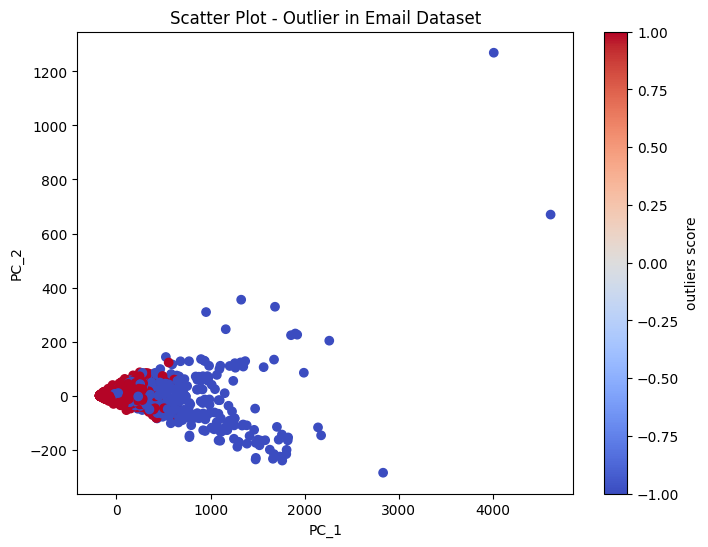

In [ ]:
# Scatter plot of reduced data
mtplt_g26.figure(figsize=(8, 6))
mtplt_g26.scatter(reduced_data_set[:, 0], reduced_data_set[:, 1], c=outliers_count, cmap='coolwarm')
mtplt_g26.colorbar(label='outliers score')
mtplt_g26.title('Scatter Plot - Outlier in Email Dataset')
mtplt_g26.xlabel('PC_1')
mtplt_g26.ylabel('PC_2')
mtplt_g26.show()


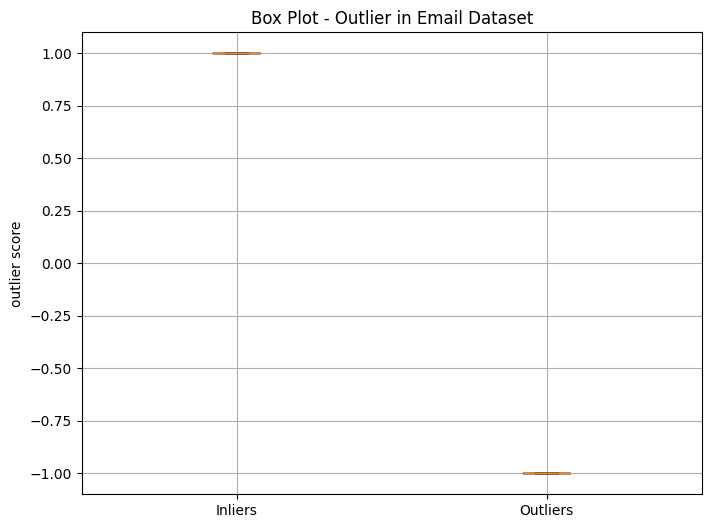

In [ ]:
mtplt_g26.figure(figsize=(8, 6))
mtplt_g26.boxplot([outliers_count[outliers_count == 1], outliers_count[outliers_count == -1]], labels=['Inliers', 'Outliers'])
mtplt_g26.title('Box Plot - Outlier in Email Dataset')
mtplt_g26.ylabel('outlier score')
mtplt_g26.grid(True)
mtplt_g26.show()

### 3.3 Normalization

In [ ]:
#features to normalize
columns_to_impute = email_df.iloc[:, 1:-1]
column_1 = email_df.iloc[:, 0]

# Simple Imputer
simple_imputer_instance = SimpleImputer(strategy='mean')  # we can consider 'median' or 'most_frequent' as well
imputed_features = pd_g26.DataFrame(simple_imputer_instance.fit_transform(columns_to_impute), columns=columns_to_impute.columns)

#including the first column
imputed_email_dataset = pd_g26.concat([column_1, imputed_features], axis=1)
print(imputed_email_dataset)

         EmailNo   the    to   ect  and  for   of      a  you   hou  ...  \
0        Email 1   0.0   0.0   1.0  0.0  0.0  0.0    2.0  0.0   0.0  ...   
1        Email 2   8.0  13.0  24.0  6.0  6.0  2.0  102.0  1.0  27.0  ...   
2        Email 3   0.0   0.0   1.0  0.0  0.0  0.0    8.0  0.0   0.0  ...   
3        Email 4   0.0   5.0  22.0  0.0  5.0  1.0   51.0  2.0  10.0  ...   
4        Email 5   7.0   6.0  17.0  1.0  5.0  2.0   57.0  0.0   9.0  ...   
...          ...   ...   ...   ...  ...  ...  ...    ...  ...   ...  ...   
5167  Email 5168   2.0   2.0   2.0  3.0  0.0  0.0   32.0  0.0   0.0  ...   
5168  Email 5169  35.0  27.0  11.0  2.0  6.0  5.0  151.0  4.0   3.0  ...   
5169  Email 5170   0.0   0.0   1.0  1.0  0.0  0.0   11.0  0.0   0.0  ...   
5170  Email 5171   2.0   7.0   1.0  0.0  2.0  1.0   28.0  2.0   0.0  ...   
5171  Email 5172  22.0  24.0   5.0  1.0  6.0  5.0  148.0  8.0   2.0  ...   

      enhancements  connevey  jay  valued  lay  infrastructure  military  \
0          

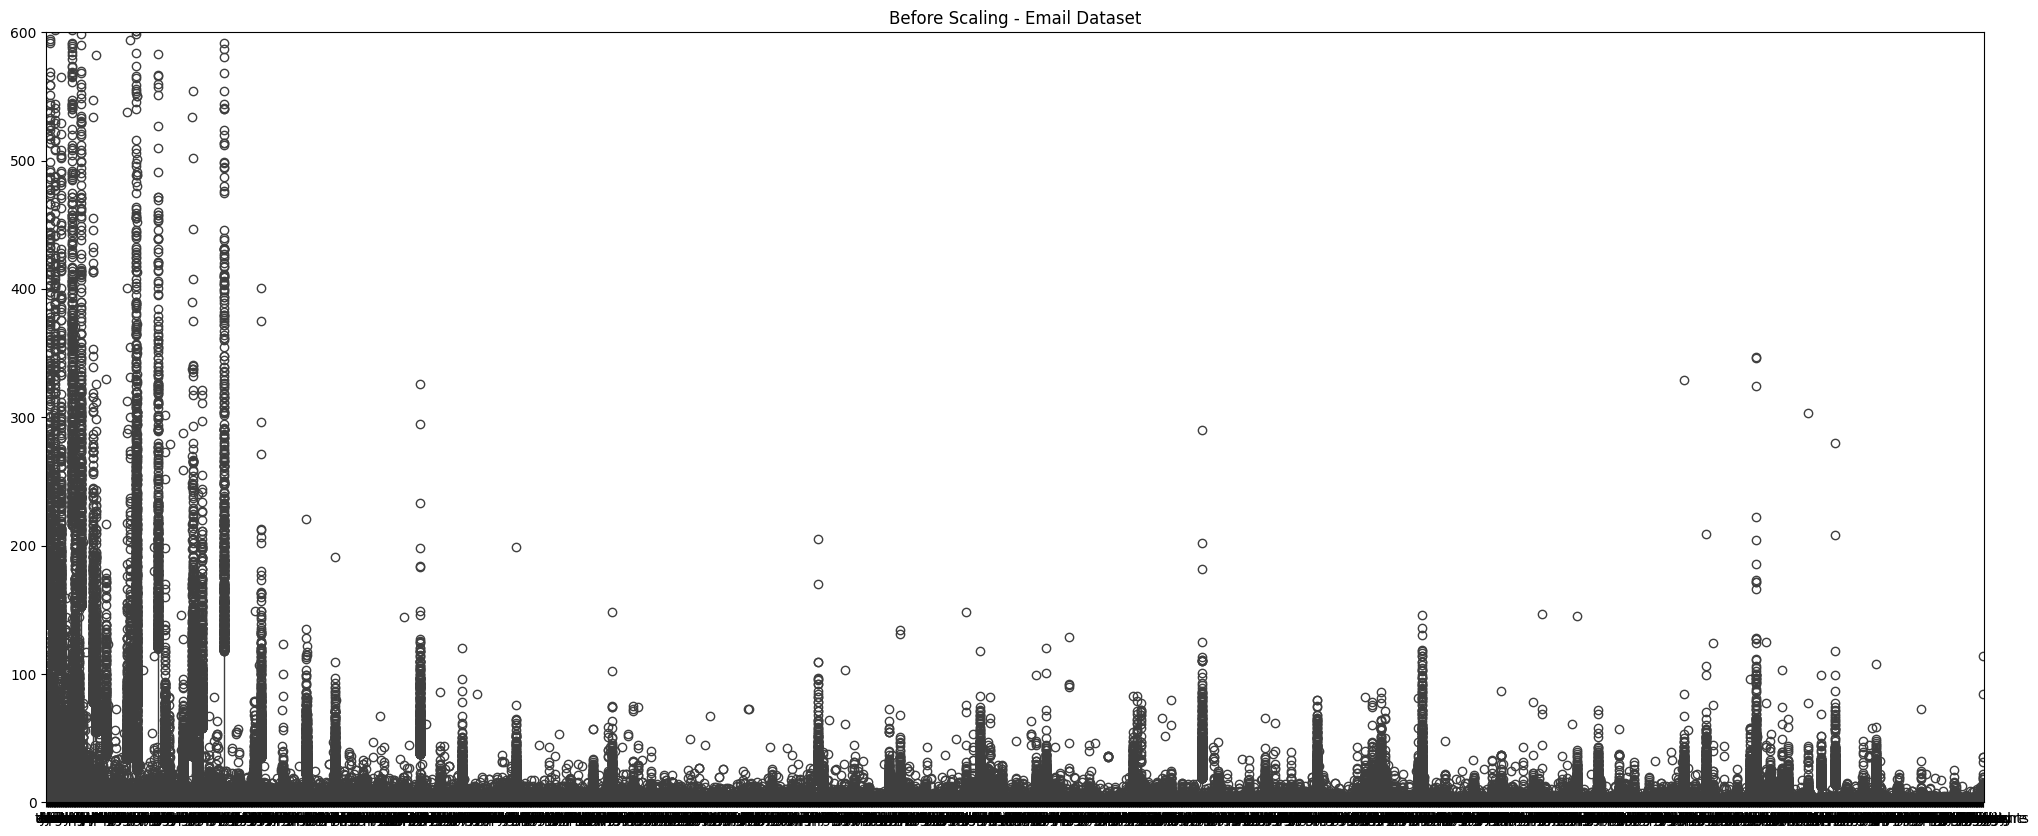

In [ ]:
# columns with numeric and float values
features = imputed_email_dataset.select_dtypes(include=['number', 'float']).columns

# Box plot before scaling
mtplt_g26.figure(figsize=(25, 10))
sbrn_g26.boxplot(data=imputed_email_dataset[features])
mtplt_g26.title('Before Scaling - Email Dataset')
mtplt_g26.ylim(0, 600)
mtplt_g26.show()

In [ ]:
#MinMax Scaling
minmax_scaler_instance = MinMaxScaler()

#dataset scaling
imputed_email_dataset[features] = minmax_scaler_instance.fit_transform(imputed_email_dataset[features])

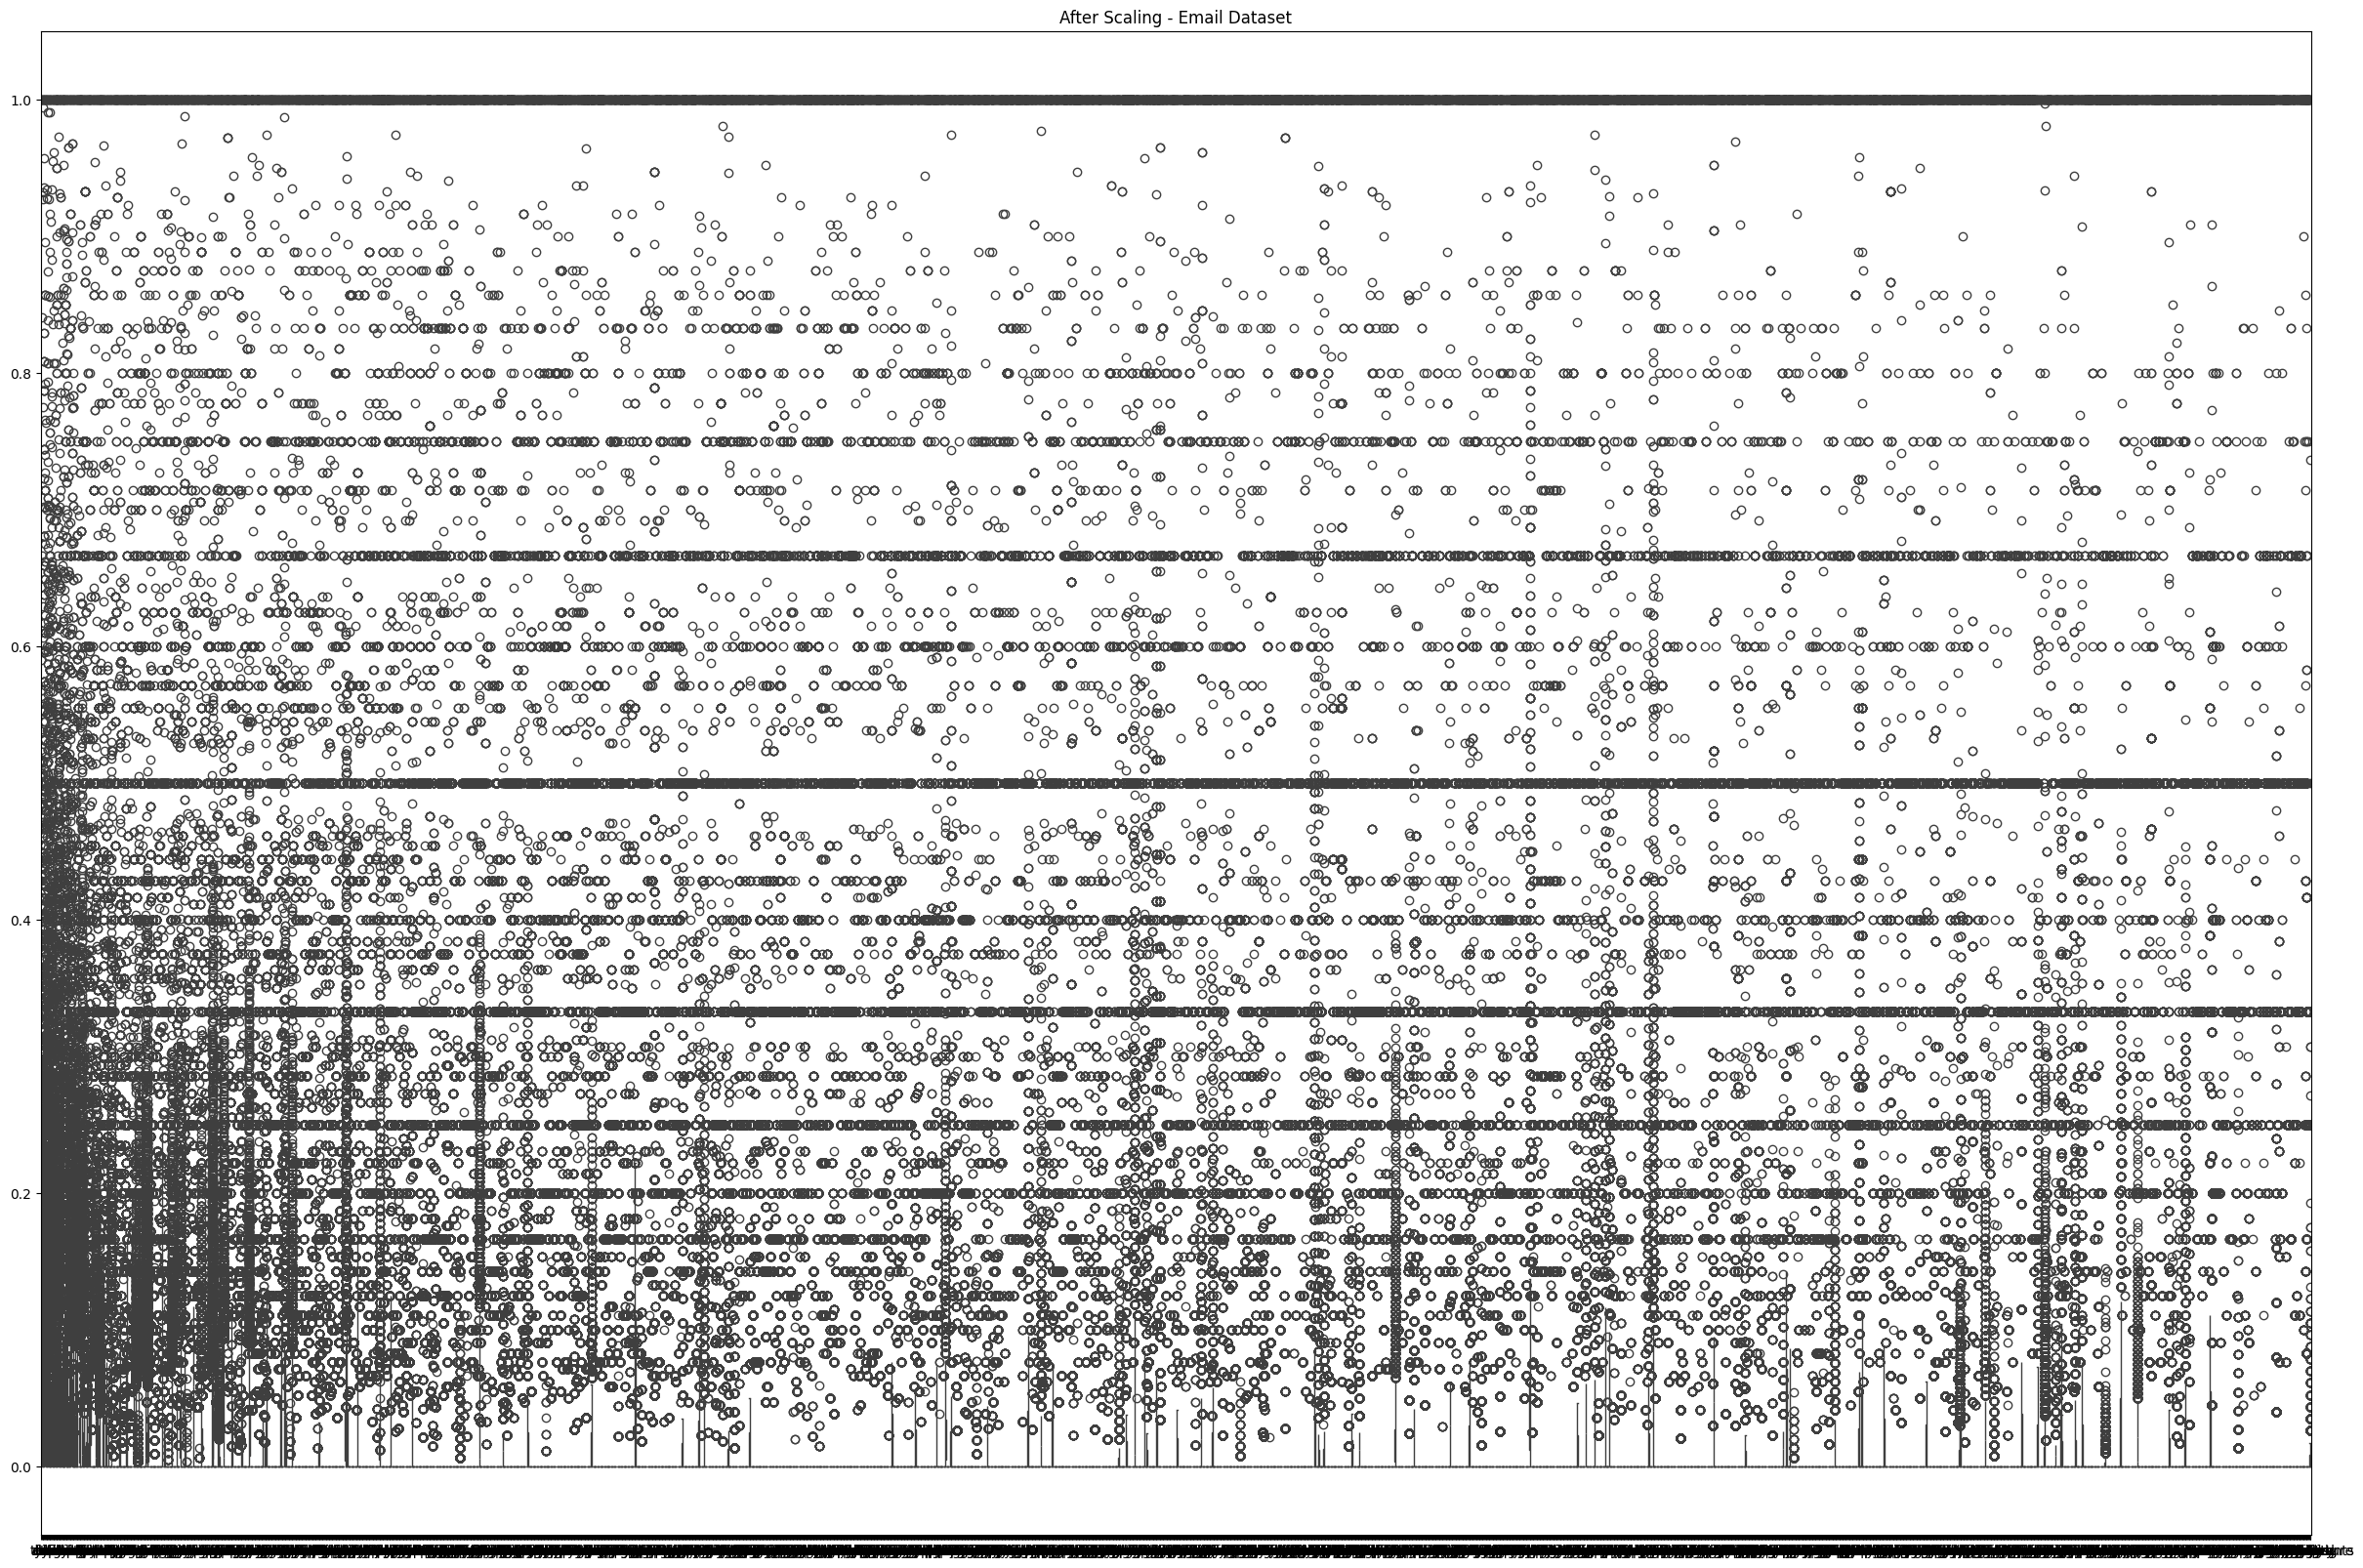

In [ ]:
# Box plot after scaling
mtplt_g26.figure(figsize=(30, 20))
sbrn_g26.boxplot(data=imputed_email_dataset[features])

mtplt_g26.title('After Scaling - Email Dataset')
mtplt_g26.show()

## 4. Split the data for Training and Testing

In [ ]:
X = imputed_email_dataset.iloc[:, 1:]  # features
y = email_df['predictionclass']  #predicted data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #training and testing the email dataset

## 5. Training the Models

### 5.1 Declaring the performance metrics for different models

In [ ]:
# compute accuracy, precision, recall and f1_score for each model

performance_metrics = {
  "Random_Forest_Gini": {
    "accuracy": 0,
    "precision": 0,
    "recall": 0,
    "f1-score": 0
  },
  "Random_Forest_Entropy": {
    "accuracy": 0,
    "precision": 0,
    "recall": 0,
    "f1-score": 0
  },
  "NaiveBayes_Gaussian": {
    "accuracy": 0,
    "precision": 0,
    "recall": 0,
    "f1-score": 0
  },
  "NaiveBayes_Multinomial": {
    "accuracy": 0,
    "precision": 0,
    "recall": 0,
    "f1-score": 0
  },
  "SVM": {
        "accuracy": 0,
        "precision": 0,
        "recall": 0,
        "f1-score": 0
  },
  "Gradient_Boosting": {
      "accuracy": 0,
      "precision": 0,
      "recall": 0,
      "f1-score": 0
    }
}

### 5.2 Random Forest - Gini

5.2.1 Training the Random Forest (*GINI*) with Different Hyperparameters

In [ ]:
rf_performance_results = {
    'rf_gini_accuracy': {},
    'rf_gini_precision': {},
    'rf_gini_recall': {},
    'rf_gini_f1_score': {}
}

# param_grid for random forest with different values
random_forest_param_grid= {

    #defines no. of decision trees to create
    'rf_n_estimators': [4, 8, 16, 20, 24],

    #defines max depth of each decision tree
    'rf_max_depth': [10, 15, 20, 25],

    #min no. of samples required to split the each internal node
    'rf_min_samples_split': [3, 6, 8, 11],

    #min no. of sample should be there at the leaf node
    'rf_min_samples_leaf': [2, 4, 6, 8],
}

#training the model with various hyper-parameter combinations
for rf_n_estimators in random_forest_param_grid['rf_n_estimators']:
    for rf_max_depth in random_forest_param_grid['rf_max_depth']:
        for rf_min_samples_split in random_forest_param_grid['rf_min_samples_split']:
            for rf_min_samples_leaf in random_forest_param_grid['rf_min_samples_leaf']:

                #construct an instance of a random forest classifier using the gini criterion
                rf_model = RandomForestClassifier(
                    n_estimators=rf_n_estimators,
                    max_depth=rf_max_depth,
                    criterion='gini',
                    min_samples_split=rf_min_samples_split,
                    min_samples_leaf=rf_min_samples_leaf,
                )

                #predict and train the model
                rf_model.fit(X_train, y_train)
                rf_model_y_pred = rf_model.predict(X_test)

                #determine the performance metrics for random forest with gini(criteria)
                rf_model_accuracy = accuracy_score_g26(y_test, rf_model_y_pred)
                rf_model_precision = precision_score_g26(y_test, rf_model_y_pred, average='weighted',zero_division=1)
                rf_model_recall = recall_score_g26(y_test, rf_model_y_pred, average='weighted')
                rf_model_f1_score = f1_score_g26(y_test, rf_model_y_pred, average='weighted')

                #display the performance for various parameter combinations.
                print(f"\nRandom_Forest_Hyper_Params: {{'n_estimators': {rf_n_estimators}, 'max_depth': {rf_max_depth}, 'min_samples_split': {rf_min_samples_split}, 'min_samples_leaf': {rf_min_samples_leaf}}}")
                print(f"RF_Accuracy: {rf_model_accuracy:.4f}")
                print(f"RF_Precision: {rf_model_precision:.4f}")
                print(f"RF_Recall: {rf_model_recall:.4f}")
                print(f"RF_F1 Score: {rf_model_f1_score:.4f}")

                #store the perfomance metrics
                rf_performance_results['rf_gini_accuracy'][(rf_n_estimators, rf_max_depth, rf_min_samples_split, rf_min_samples_leaf)] = rf_model_accuracy
                rf_performance_results['rf_gini_precision'][(rf_n_estimators, rf_max_depth, rf_min_samples_split, rf_min_samples_leaf)] = rf_model_precision
                rf_performance_results['rf_gini_recall'][(rf_n_estimators, rf_max_depth, rf_min_samples_split, rf_min_samples_leaf)] = rf_model_recall
                rf_performance_results['rf_gini_f1_score'][(rf_n_estimators, rf_max_depth, rf_min_samples_split, rf_min_samples_leaf)] = rf_model_f1_score


Random_Forest_Hyper_Params: {'n_estimators': 4, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2}
RF_Accuracy: 0.8776
RF_Precision: 0.8790
RF_Recall: 0.8776
RF_F1 Score: 0.8656

Random_Forest_Hyper_Params: {'n_estimators': 4, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 4}
RF_Accuracy: 0.8698
RF_Precision: 0.8722
RF_Recall: 0.8698
RF_F1 Score: 0.8563

Random_Forest_Hyper_Params: {'n_estimators': 4, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 6}
RF_Accuracy: 0.8608
RF_Precision: 0.8624
RF_Recall: 0.8608
RF_F1 Score: 0.8476

Random_Forest_Hyper_Params: {'n_estimators': 4, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 8}
RF_Accuracy: 0.8769
RF_Precision: 0.8790
RF_Recall: 0.8769
RF_F1 Score: 0.8638

Random_Forest_Hyper_Params: {'n_estimators': 4, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 2}
RF_Accuracy: 0.8570
RF_Precision: 0.8605
RF_Recall: 0.8570
RF_F1 Score: 0.8413

Random_Forest_Hyper_Params: {'n_estimat

5.2.2 Determine the Best values for Random Forest(GINI) based on 'ACCURACY'

In [ ]:
#Find the best params combination with respect to accuracy
rf_gini_best_params_acc = max(rf_performance_results['rf_gini_accuracy'], key=rf_performance_results['rf_gini_accuracy'].get)

# get the best hyper-param values
best_rf_gini_hyperparameter_set = {
    'n_estimators': rf_gini_best_params_acc[0],
    'max_depth': rf_gini_best_params_acc[1],
    'min_samples_split': rf_gini_best_params_acc[2],
    'min_samples_leaf': rf_gini_best_params_acc[3]
}

# get respective preformance values
best_rf_gini_accuracy = rf_performance_results['rf_gini_accuracy'][rf_gini_best_params_acc]
best_rf_gini_precision = rf_performance_results['rf_gini_precision'][rf_gini_best_params_acc]
best_rf_gini_recall = rf_performance_results['rf_gini_recall'][rf_gini_best_params_acc]
best_rf_gini_f1_score = rf_performance_results['rf_gini_f1_score'][rf_gini_best_params_acc]

# Store the best results
performance_metrics['Random_Forest_Gini'] = {
        "accuracy" : best_rf_gini_accuracy,
        "precision" : best_rf_gini_precision,
        "recall" : best_rf_gini_recall,
        "f1-score" : best_rf_gini_f1_score
    }

# Print the results
print("\nBest Values for Random Forest(GINI) based on accuracy:", best_rf_gini_hyperparameter_set)

print("\nRF_GINI Best Accuracy:", best_rf_gini_accuracy)
print("RF_GINI Best Precision:", best_rf_gini_precision)
print("RF_GINI Best Recall:", best_rf_gini_recall)
print("RF_GINI Best F1 Score:", best_rf_gini_f1_score)


Best Values for Random Forest(GINI) based on accuracy: {'n_estimators': 24, 'max_depth': 25, 'min_samples_split': 11, 'min_samples_leaf': 2}

RF_GINI Best Accuracy: 0.9420103092783505
RF_GINI Best Precision: 0.9432867607162235
RF_GINI Best Recall: 0.9420103092783505
RF_GINI Best F1 Score: 0.9309158672069513


5.2.3 Plot the Best values for Random Forest(GINI) based on 'ACCURACY'

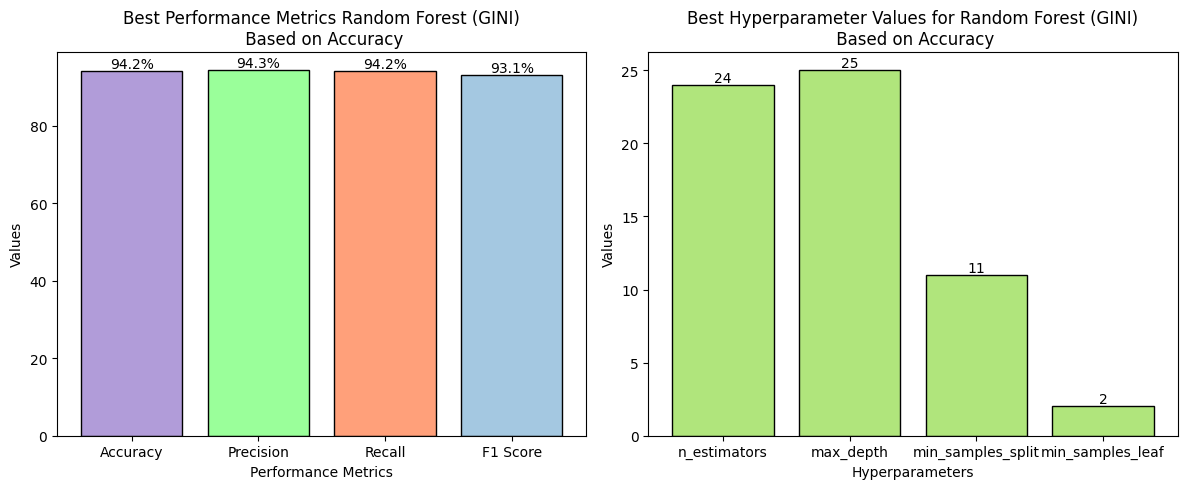

In [ ]:
# Bar Plot -1 : Best Performance Metrics

# Define performance metrics
performance_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
rf_gini_performance_values = [best_rf_gini_accuracy, best_rf_gini_precision, best_rf_gini_recall, best_rf_gini_f1_score]

# Convert values to percentages
percentage_values = [value * 100 for value in rf_gini_performance_values]

# Define custom colors palette
custom_colors_palette = ['#B19CD9', '#9AFF9A', '#FFA07A', '#A4C8E1']

# Create first bar graph
mtplt_g26.figure(figsize=(12, 5))
mtplt_g26.subplot(1, 2, 1)
bars = mtplt_g26.bar(performance_metrics, percentage_values, color=custom_colors_palette, edgecolor='black')

# Add percentage labels on each bar
for bar, value in zip(bars, percentage_values):
    height = bar.get_height()
    mtplt_g26.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.1f}%', ha='center', va='bottom')

# Add outline to each bar
for bar in bars:
    bar.set_linewidth(1)
    bar.set_edgecolor('black')

# Set labels and title
mtplt_g26.xlabel('Performance Metrics')
mtplt_g26.ylabel('Values')
mtplt_g26.title('Best Performance Metrics Random Forest (GINI)\n Based on Accuracy')

# Bar Plot - 2: Best Hyperparameter Values
mtplt_g26.subplot(1, 2, 2)
bar_2 = mtplt_g26.bar(best_rf_gini_hyperparameter_set.keys(), best_rf_gini_hyperparameter_set.values(), color='#B0E57C', edgecolor='black')

for bar2, value in zip(bar_2, best_rf_gini_hyperparameter_set.values()):
    height = bar2.get_height()
    mtplt_g26.text(bar2.get_x() + bar2.get_width() / 2, height, f'{value}', ha='center', va='bottom')

mtplt_g26.xlabel('Hyperparameters')
mtplt_g26.ylabel('Values')
mtplt_g26.title('Best Hyperparameter Values for Random Forest (GINI)\n Based on Accuracy')

# Adjust layout
mtplt_g26.tight_layout()

# Display the Bar Plots
mtplt_g26.show()

### 5.3 Random Forest (Entropy)

### 5.3.1 Training the Random Forest (Entropy) with Different Hyperparameters

In [ ]:
rf_entropy_performance_results = {
    'rf_entropy_accuracy': {},
    'rf_entropy_precision': {},
    'rf_entropy_recall': {},
    'rf_entropy_f1_score': {}
}

rf_entropy_param_grid = {
    'n_estimators': [4, 8, 12, 16, 20],
    'max_depth': [6, 11, 16, 21],
    'min_samples_split': [2, 4, 6, 9],
    'min_samples_leaf': [2, 3, 5, 8],
}

# Iterate through all combinations
for n_estimators in rf_entropy_param_grid['n_estimators']:
    for max_depth in rf_entropy_param_grid['max_depth']:
        for min_samples_split in rf_entropy_param_grid['min_samples_split']:
            for min_samples_leaf in rf_entropy_param_grid['min_samples_leaf']:

                rf_entropy_classifier = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    criterion='entropy',
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                )

                rf_entropy_classifier.fit(X_train, y_train)
                rf_entropy_y_pred = rf_entropy_classifier.predict(X_test)

                #computing performance metrics such as accuracy,precision,recall,f1_score
                rf_entropy_accuracy = accuracy_score_g26(y_test, rf_entropy_y_pred)
                rf_entropy_precision = precision_score_g26(y_test, rf_entropy_y_pred,average='weighted',zero_division=1)
                rf_entropy_recall = recall_score_g26(y_test, rf_entropy_y_pred,average='weighted')
                rf_entropy_f1_score = f1_score_g26(y_test, rf_entropy_y_pred, average='weighted')

                #displaying the hyperparams and respective presformance metrics
                print(f"\nParams: {{'n_estimators': {n_estimators}, 'max_depth': {max_depth}, 'min_samples_split': {min_samples_split}, 'min_samples_leaf': {min_samples_leaf}}}")
                print(f"Accuracy: {rf_entropy_accuracy:.4f}")
                print(f"Precision: {rf_entropy_precision:.4f}")
                print(f"Recall: {rf_entropy_recall:.4f}")
                print(f"F1 Score: {rf_entropy_f1_score:.4f}")


                rf_entropy_performance_results['rf_entropy_accuracy'][(n_estimators, max_depth, min_samples_split, min_samples_leaf)] = rf_entropy_accuracy
                rf_entropy_performance_results['rf_entropy_precision'][(n_estimators, max_depth, min_samples_split, min_samples_leaf)] = rf_entropy_precision
                rf_entropy_performance_results['rf_entropy_recall'][(n_estimators, max_depth, min_samples_split, min_samples_leaf)] = rf_entropy_recall
                rf_entropy_performance_results['rf_entropy_f1_score'][(n_estimators, max_depth, min_samples_split, min_samples_leaf)] = rf_entropy_f1_score


Params: {'n_estimators': 4, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 2}
Accuracy: 0.8235
Precision: 0.8359
Recall: 0.8235
F1 Score: 0.7993

Params: {'n_estimators': 4, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 3}
Accuracy: 0.8125
Precision: 0.8230
Recall: 0.8125
F1 Score: 0.7861

Params: {'n_estimators': 4, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 5}
Accuracy: 0.8293
Precision: 0.8400
Recall: 0.8293
F1 Score: 0.8063

Params: {'n_estimators': 4, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 8}
Accuracy: 0.8054
Precision: 0.8180
Recall: 0.8054
F1 Score: 0.7761

Params: {'n_estimators': 4, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 2}
Accuracy: 0.8293
Precision: 0.8409
Recall: 0.8293
F1 Score: 0.8056

Params: {'n_estimators': 4, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 3}
Accuracy: 0.8415
Precision: 0.8516
Recall: 0.8415
F1 Score: 0.8206

Params: {'n_estimators': 4, 'max_depth': 6, '

### 5.3.2 Fnd the best Params for RandomForest(Entropy)

In [ ]:
# Find the best params..
best_entropy_accuracy_params = max(rf_entropy_performance_results['rf_entropy_accuracy'], key=rf_entropy_performance_results['rf_entropy_accuracy'].get)

# Map hyperparameter names to values
best_entropy_hyperparameter_set = {
    'n_estimators': best_entropy_accuracy_params[0],
    'max_depth': best_entropy_accuracy_params[1],
    'min_samples_split': best_entropy_accuracy_params[2],
    'min_samples_leaf': best_entropy_accuracy_params[3]
}

# Retrieving  the corresponding metrics
rf_entropy_best_accuracy = rf_entropy_performance_results['rf_entropy_accuracy'][best_entropy_accuracy_params]
rf_entropy_best_precision = rf_entropy_performance_results['rf_entropy_precision'][best_entropy_accuracy_params]
rf_entropy_best_recall = rf_entropy_performance_results['rf_entropy_recall'][best_entropy_accuracy_params]
rf_entropy_best_f1 = rf_entropy_performance_results['rf_entropy_f1_score'][best_entropy_accuracy_params]

# Store the best results
performance_metrics['Random_Forest_Entropy'] = {
        "accuracy" : rf_entropy_best_accuracy,
        "precision" : rf_entropy_best_precision,
        "recall" : rf_entropy_best_recall,
        "f1-score" : rf_entropy_best_f1
    }

# Print the results
print("\nBest Hyperparameter Combination (Accuracy):", best_entropy_hyperparameter_set)

print("\nBest Accuracy:", rf_entropy_best_accuracy)
print("Best Precision:", rf_entropy_best_precision)
print("Best Recall:", rf_entropy_best_recall)
print("Best F1 Score:", rf_entropy_best_f1)



Best Hyperparameter Combination (Accuracy): {'n_estimators': 20, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 8}

Best Accuracy: 0.9432989690721649
Best Precision: 0.9446495426779049
Best Recall: 0.9432989690721649
Best F1 Score: 0.9322473540104376


### 5.3.3 plot the Best Metrics for Random Forest (Entropy)

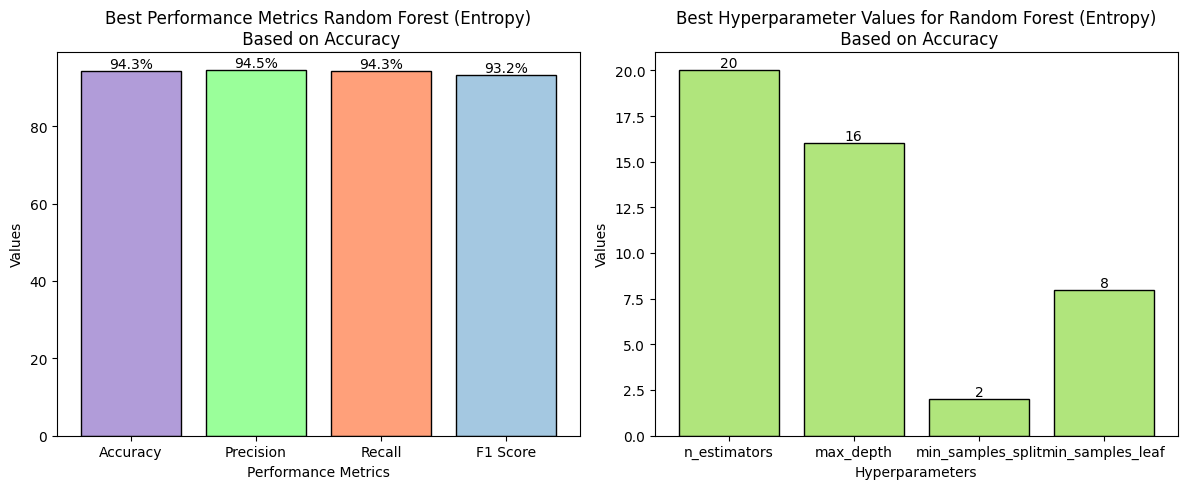

In [ ]:
# Bar Plot -1 : Best Performance Metrics

# Define performance metrics
performance_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
rf_entropy_performance_values = [rf_entropy_best_accuracy, rf_entropy_best_precision, rf_entropy_best_recall, rf_entropy_best_f1]

# Convert values to percentages
percentage_values = [value * 100 for value in rf_entropy_performance_values]

# Define custom colors palette
category_classifying_colors = ['#B19CD9', '#9AFF9A', '#FFA07A', '#A4C8E1']

# Create first bar graph
mtplt_g26.figure(figsize=(12, 5))
mtplt_g26.subplot(1, 2, 1)
bars = mtplt_g26.bar(performance_metrics, percentage_values, color=category_classifying_colors, edgecolor='black')

# Add percentage labels on each bar
for bar, value in zip(bars, percentage_values):
    height = bar.get_height()
    mtplt_g26.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.1f}%', ha='center', va='bottom')

# Add outline to each bar
for bar in bars:
    bar.set_linewidth(1)
    bar.set_edgecolor('black')

# Set labels and title
mtplt_g26.xlabel('Performance Metrics')
mtplt_g26.ylabel('Values')
mtplt_g26.title('Best Performance Metrics Random Forest (Entropy)\n Based on Accuracy')

# Bar Plot - 2: Best Hyperparameter Values
mtplt_g26.subplot(1, 2, 2)
bar_2 = mtplt_g26.bar(best_entropy_hyperparameter_set.keys(), best_entropy_hyperparameter_set.values(), color='#B0E57C', edgecolor='black')

for bar2, value in zip(bar_2, best_entropy_hyperparameter_set.values()):
    height = bar2.get_height()
    mtplt_g26.text(bar2.get_x() + bar2.get_width() / 2, height, f'{value}', ha='center', va='bottom')

mtplt_g26.xlabel('Hyperparameters')
mtplt_g26.ylabel('Values')
mtplt_g26.title('Best Hyperparameter Values for Random Forest (Entropy)\n Based on Accuracy')

# Adjust layout
mtplt_g26.tight_layout()

# Display the Bar Plots
mtplt_g26.show()


### 5.4 NaiveBayes_Gaussian

Performance Metrics with Gaussian Naive Bayes:
Accuracy: 0.87
Precision: 0.90
Recall: 0.87
F1 Score: 0.88
Confusion Matrix:

[[952  62  59]
 [ 22 393  28]
 [ 19  13   4]]





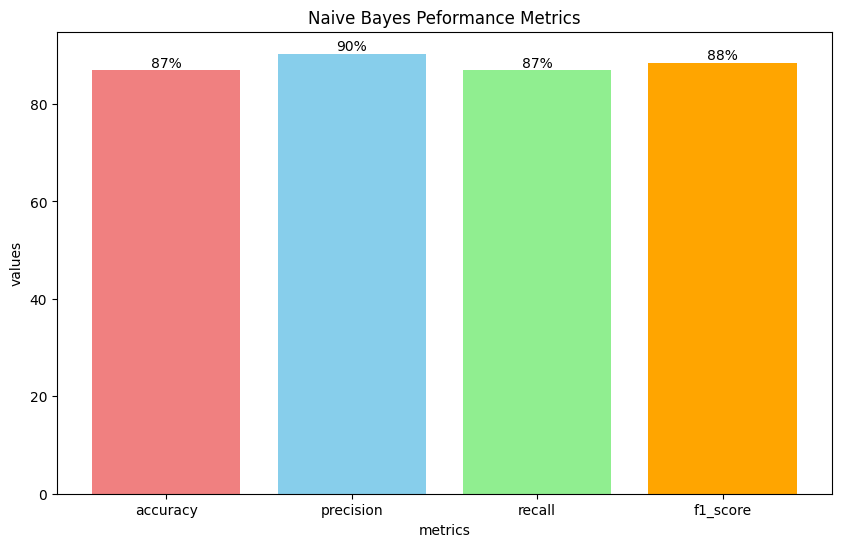

In [ ]:

nb_gaussian_instance = GaussianNB()
nb_gaussian_instance.fit(X_train, y_train)
nb_gaussian_y_pred = nb_gaussian_instance.predict(X_test)

# Calculate and print performance metrics
accuracy = accuracy_score_g26(y_test, nb_gaussian_y_pred)
precision = precision_score_g26(y_test, nb_gaussian_y_pred, average='weighted')
recall = recall_score_g26(y_test, nb_gaussian_y_pred, average='weighted')
f1 = f1_score_g26(y_test, nb_gaussian_y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, nb_gaussian_y_pred)

print("Performance Metrics with Gaussian Naive Bayes:")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("Confusion Matrix:\n")
print(conf_matrix)

print("\n\n")

performance_metrics['NaiveBayes_Gaussian'] = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1-score": f1
}

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score']
performance_metric_values = [accuracy*100, precision*100, recall*100, f1*100]

category_classifying_colors = ['lightcoral', 'skyblue', 'lightgreen', 'orange']
mtplt_g26.figure(figsize=(10, 6))
bars = mtplt_g26.bar(metrics_to_plot, performance_metric_values, color=category_classifying_colors)

# Add percentages on each bar
for bar in bars:
    mtplt_g26.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}%', ha='center', va='bottom', color='black')

# Set labels and title
mtplt_g26.xlabel('metrics')
mtplt_g26.ylabel('values')
mtplt_g26.title('Naive Bayes Peformance Metrics')
mtplt_g26.show()

### 5.5 Naive Bayes Multinomial

Performance Metrics with Multinomial Naive Bayes:
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.90





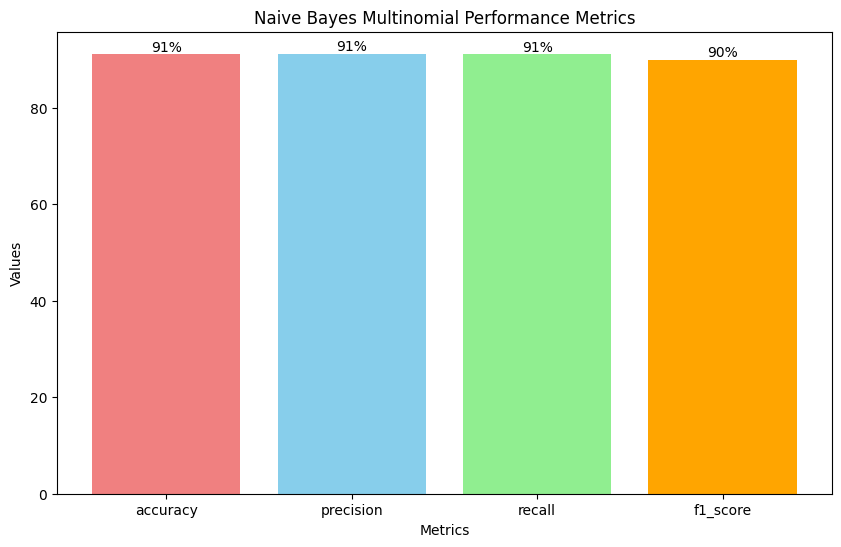

In [ ]:

# Create Naive Bayes Multinomial instance and train the model
nb_multinomial_instance = MultinomialNB()
nb_multinomial_instance.fit(X_train, y_train)
nb_multinomial_y_pred = nb_multinomial_instance.predict(X_test)

# Calculate performance metrics
nb_multinomial_accuracy = accuracy_score_g26(y_test, nb_multinomial_y_pred)
nb_multinomial_precision = precision_score_g26(y_test, nb_multinomial_y_pred, average='weighted', zero_division=1)
nb_multinomial_recall = recall_score_g26(y_test, nb_multinomial_y_pred, average='weighted')
nb_multinomial_f1_score = f1_score_g26(y_test, nb_multinomial_y_pred, average='weighted')
nb_multinomial_conf_matrix = confusion_matrix(y_test, nb_multinomial_y_pred)

# Display performance metrics
print("Performance Metrics with Multinomial Naive Bayes:")
print(f"Accuracy: {nb_multinomial_accuracy:.2f}")
print(f"Precision: {nb_multinomial_precision:.2f}")
print(f"Recall: {nb_multinomial_recall:.2f}")
print(f"F1 Score: {nb_multinomial_f1_score:.2f}")
print("\n\n")

# Store the performance metrics in the dictionary
performance_metrics['NaiveBayes_Multinomial'] = {
    "accuracy": nb_multinomial_accuracy,
    "precision": nb_multinomial_precision,
    "recall": nb_multinomial_recall,
    "f1-score": nb_multinomial_f1_score
}

# Visualize the performance metrics
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score']
performance_metric_values = [nb_multinomial_accuracy * 100, nb_multinomial_precision * 100, nb_multinomial_recall * 100, nb_multinomial_f1_score * 100]

category_classifying_colors = ['lightcoral', 'skyblue', 'lightgreen', 'orange']
mtplt_g26.figure(figsize=(10, 6))
bars = mtplt_g26.bar(metrics_to_plot, performance_metric_values, color=category_classifying_colors)

# Add percentages on each bar
for bar in bars:
    mtplt_g26.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}%', ha='center', va='bottom', color='black')

# Set labels and title
mtplt_g26.xlabel('Metrics')
mtplt_g26.ylabel('Values')
mtplt_g26.title('Naive Bayes Multinomial Performance Metrics')
mtplt_g26.show()

print("\n\n")
mtplt_g26.show()


### SVM

In [ ]:
#svm model implemenatation

svm_results = {
    'svm_accuracies': [],
    'svm_precisions': [],
    'svm_recalls': [],
    'svm_f1_scores': []
}
svm_accuracies = []
svm_precisions = []
svm_recalls = []
svm_f1_scores = []

#create param grid with different combinations
svm_hyperparameters_grid = [
    {'model': 'SVM_linear', "value":{'kernel': 'linear', 'C': 1.0}},
    {'model': 'SVM_Poly (degree=3)', "value":{'kernel': 'poly', 'degree': 3, 'C': 1.0}},
    {'model': 'SVM_RBF (gamma=scale)', "value":{'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0}},
    {'model': 'SVM_Poly (degree=1)', "value":{'kernel': 'poly', 'degree': 1, 'C': 1.0}},
    {'model': 'SVM_Sigmoid', "value":{'kernel': 'sigmoid'}}
]

for svm_hyperparameters in svm_hyperparameters_grid:
    svm_hyperparameter_value = svm_hyperparameters['value']

    svm_clfr_instance = svc_classifier(**svm_hyperparameter_value)

    # Train the model
    svm_clfr_instance.fit(X_train, y_train)

    # test the model
    svm_y_pred_data = svm_clfr_instance.predict(X_test)

    # Calculate the performance metrics
    svm_accuracy = accuracy_score_g26(y_test, svm_y_pred_data)
    svm_precision = precision_score_g26(y_test, svm_y_pred_data, average='weighted', zero_division=1)
    svm_recall = recall_score_g26(y_test, svm_y_pred_data, average='weighted')
    svm_f1_score = f1_score_g26(y_test, svm_y_pred_data, average='weighted')

    svm_accuracies.append(svm_accuracy)
    svm_precisions.append(svm_precision)
    svm_recalls.append(svm_recall)
    svm_f1_scores.append(svm_f1_score)

    #print the performance with respect to hyperparameters
    print("\nHyperparameters" + str(svm_hyperparameters))
    print("Accuracy:", svm_accuracy)
    print("Precision:", svm_precision)
    print("Recall:", svm_recall)
    print("F1-score:", svm_f1_score)

svm_results['svm_accuracies'] = svm_accuracies
svm_results['svm_precisions'] = svm_precisions
svm_results['svm_recalls'] = svm_recalls
svm_results['svm_f1_scores'] = svm_f1_scores


Hyperparameters{'model': 'SVM_linear', 'value': {'kernel': 'linear', 'C': 1.0}}
Accuracy: 0.9445876288659794
Precision: 0.9344684976776695
Recall: 0.9445876288659794
F1-score: 0.9362397392595113

Hyperparameters{'model': 'SVM_Poly (degree=3)', 'value': {'kernel': 'poly', 'degree': 3, 'C': 1.0}}
Accuracy: 0.7338917525773195
Precision: 0.7343010483650942
Recall: 0.7338917525773195
F1-score: 0.6686909721131784

Hyperparameters{'model': 'SVM_RBF (gamma=scale)', 'value': {'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0}}
Accuracy: 0.9304123711340206
Precision: 0.9330162707555721
Recall: 0.9304123711340206
F1-score: 0.9186617756412938

Hyperparameters{'model': 'SVM_Poly (degree=1)', 'value': {'kernel': 'poly', 'degree': 1, 'C': 1.0}}
Accuracy: 0.9362113402061856
Precision: 0.938052193287306
Recall: 0.9362113402061856
F1-score: 0.9246605084078644

Hyperparameters{'model': 'SVM_Sigmoid', 'value': {'kernel': 'sigmoid'}}
Accuracy: 0.8395618556701031
Precision: 0.8425973837183447
Recall: 0.839561855

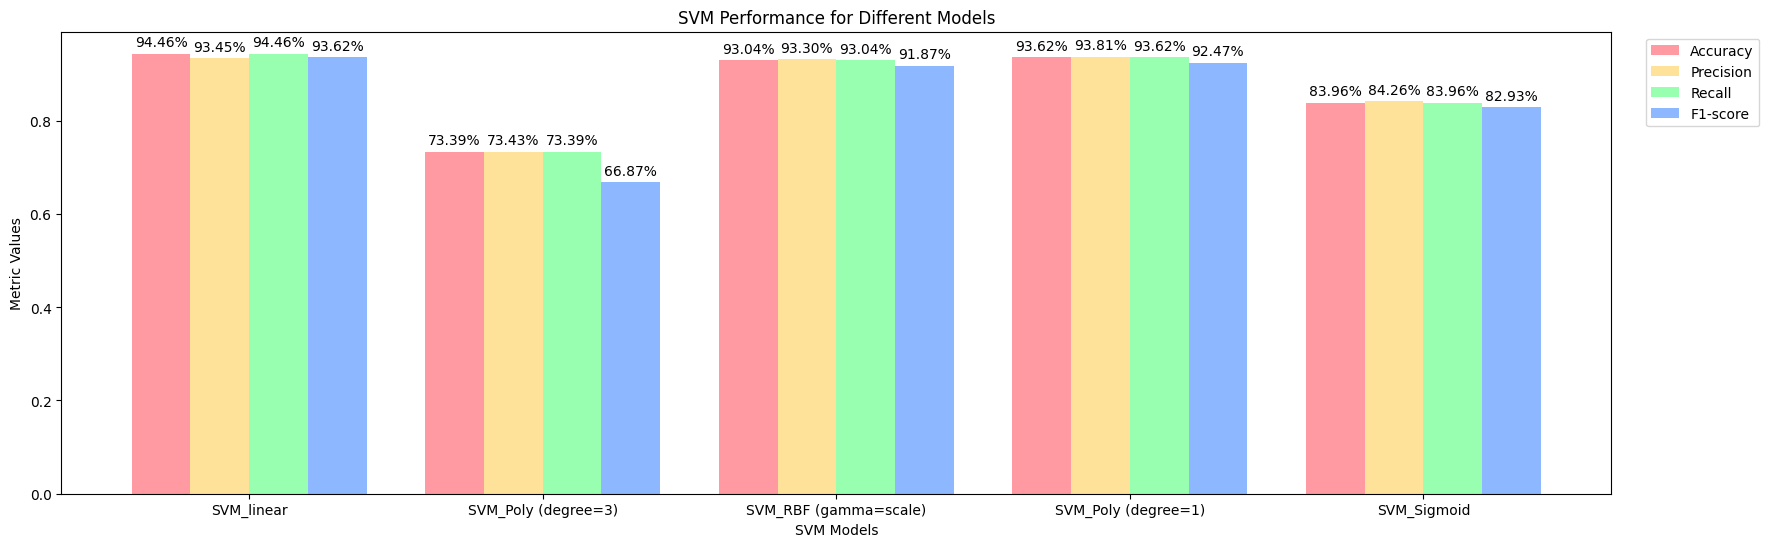

In [ ]:
# Define hyperparameter names, accuracy values, precision values, recall values, and F1 values
hyperparameter_names = [svm_hyperparameters['model'] for svm_hyperparameters in svm_hyperparameters_grid]
accuracy_values = svm_results['svm_accuracies']
precision_values = svm_results['svm_precisions']
recall_values = svm_results['svm_recalls']
f1_values = svm_results['svm_f1_scores']

# Define pastel colors
pastel_colors = ['#FF9AA2', '#FFE29A', '#99FFB0', '#8DB8FF']

# Set up positions for the bars
bar_width = 0.2
accuracy_bars = npy_g26.arange(len(hyperparameter_names))
precision_bars = [x + bar_width for x in accuracy_bars]
recall_bars = [x + bar_width for x in precision_bars]
f1_score_bars = [x + bar_width for x in recall_bars]

# Create a new figure
mtplt_g26.figure(figsize=(20, 6))

# Plot the metrics
mtplt_g26.bar(accuracy_bars, accuracy_values, width=bar_width, label='Accuracy', color=pastel_colors[0])
mtplt_g26.bar(precision_bars, precision_values, width=bar_width, label='Precision', color=pastel_colors[1])
mtplt_g26.bar(recall_bars, recall_values, width=bar_width, label='Recall', color=pastel_colors[2])
mtplt_g26.bar(f1_score_bars, f1_values, width=bar_width, label='F1-score', color=pastel_colors[3])

# Add labels and legend
mtplt_g26.xlabel('SVM Models')
mtplt_g26.ylabel('Metric Values')
mtplt_g26.title('SVM Performance for Different Models')
mtplt_g26.xticks([r + bar_width * 1.5 for r in range(len(hyperparameter_names))], hyperparameter_names)
mtplt_g26.legend(bbox_to_anchor=(1.1, 1), loc='upper right')

# Adding value on each bar
def add_values_to_bars(bars):
    for bar in bars:
        height = bar.get_height()
        mtplt_g26.annotate(f'{height:.2%}',  # Format as percentage
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values_to_bars(mtplt_g26.gca().patches)

mtplt_g26.show()


## Gradient Boosting

In [ ]:
gradient_boosting_results = {
    'gradient_boosting_accuracy': {},
    'gradient_boosting_precision': {},
    'gradient_boosting_recall': {},
    'gradient_boosting_f1_score': {}
}

# Specify the parameter grid
param_grid = {
    'n_estimators': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# loop over each combination of hyperparameters
for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:

            # Create and train the Gradient Boosting Classifier with the current hyperparameters
            gradient_boosting_instance = GradientBoostingClassifier(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            gradient_boosting_instance.fit(X_train, y_train)

            gradient_boosting_y_pred = gradient_boosting_instance.predict(X_test)

            # Compute evaluation metrics
            gradient_boosting_accuracy = accuracy_score_g26(y_test, gradient_boosting_y_pred)
            gradient_boosting_precision = precision_score_g26(y_test, gradient_boosting_y_pred, average='weighted', zero_division=1)
            gradient_boosting_recall = recall_score_g26(y_test, gradient_boosting_y_pred, average='weighted',zero_division=1)
            gradient_boosting_f1_score = f1_score_g26(y_test, gradient_boosting_y_pred, average='weighted',zero_division=1)

            # Displaying the hyperparams and respective performance metrics
            print(f"\nParams: {{'n_estimators': {n_estimators}, 'max_depth': {max_depth}, 'learning_rate': {learning_rate}}}")
            print(f"Accuracy: {gradient_boosting_accuracy:.4f}")
            print(f"Precision: {gradient_boosting_precision:.4f}")
            print(f"Recall: {gradient_boosting_recall:.4f}")
            print(f"F1 Score: {gradient_boosting_f1_score:.4f}")

            # Store results in the dictionary
            gradient_boosting_results['gradient_boosting_accuracy'][(n_estimators, max_depth, learning_rate)] = gradient_boosting_accuracy
            gradient_boosting_results['gradient_boosting_precision'][(n_estimators, max_depth, learning_rate)] = gradient_boosting_precision
            gradient_boosting_results['gradient_boosting_recall'][(n_estimators, max_depth, learning_rate)] = gradient_boosting_recall
            gradient_boosting_results['gradient_boosting_f1_score'][(n_estimators, max_depth, learning_rate)] = gradient_boosting_f1_score



Params: {'n_estimators': 5, 'max_depth': 3, 'learning_rate': 0.01}
Accuracy: 0.6914
Precision: 0.7866
Recall: 0.6914
F1 Score: 0.5652

Params: {'n_estimators': 5, 'max_depth': 5, 'learning_rate': 0.01}
Accuracy: 0.6914
Precision: 0.7866
Recall: 0.6914
F1 Score: 0.5652

Params: {'n_estimators': 5, 'max_depth': 7, 'learning_rate': 0.01}
Accuracy: 0.6914
Precision: 0.7866
Recall: 0.6914
F1 Score: 0.5652

Params: {'n_estimators': 5, 'max_depth': 3, 'learning_rate': 0.1}
Accuracy: 0.7938
Precision: 0.8035
Recall: 0.7938
F1 Score: 0.7582

Params: {'n_estimators': 5, 'max_depth': 5, 'learning_rate': 0.1}
Accuracy: 0.8325
Precision: 0.8342
Recall: 0.8325
F1 Score: 0.8094

Params: {'n_estimators': 5, 'max_depth': 7, 'learning_rate': 0.1}
Accuracy: 0.8499
Precision: 0.8513
Recall: 0.8499
F1 Score: 0.8339

Params: {'n_estimators': 5, 'max_depth': 3, 'learning_rate': 0.2}
Accuracy: 0.8299
Precision: 0.8243
Recall: 0.8299
F1 Score: 0.8103

Params: {'n_estimators': 5, 'max_depth': 5, 'learning_rate


Best Hyperparameters based on Accuracy:
Params: {'n_estimators': 15, 'max_depth': 7, 'learning_rate': 0.2}
Accuracy: 0.9253
Precision: 0.9175
Recall: 0.9253
F1 Score: 0.9212





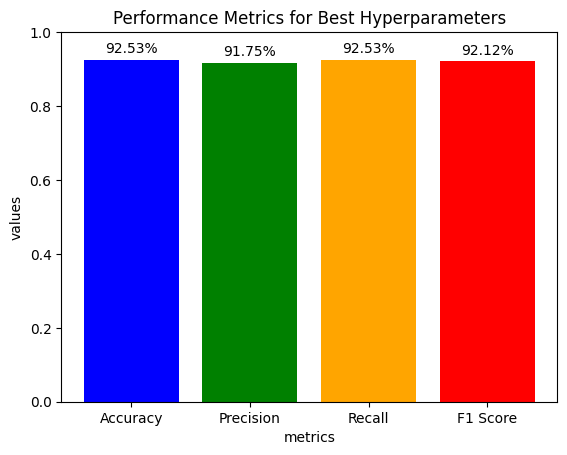

In [ ]:
# Find the best hyperparameters based on accuracy
best_accuracy_params = max(gradient_boosting_results['gradient_boosting_accuracy'], key=gradient_boosting_results['gradient_boosting_accuracy'].get)

# Display the best hyperparameters and their performance metrics
print("\nBest Hyperparameters based on Accuracy:")
print(f"Params: {{'n_estimators': {best_accuracy_params[0]}, 'max_depth': {best_accuracy_params[1]}, 'learning_rate': {best_accuracy_params[2]}}}")
print(f"Accuracy: {gradient_boosting_results['gradient_boosting_accuracy'][best_accuracy_params]:.4f}")
print(f"Precision: {gradient_boosting_results['gradient_boosting_precision'][best_accuracy_params]:.4f}")
print(f"Recall: {gradient_boosting_results['gradient_boosting_recall'][best_accuracy_params]:.4f}")
print(f"F1 Score: {gradient_boosting_results['gradient_boosting_f1_score'][best_accuracy_params]:.4f}")

#storing the metrics

performance_metrics['Gradient_Boosting'] = {
    "accuracy": gradient_boosting_results['gradient_boosting_accuracy'][best_accuracy_params],
    "precision": gradient_boosting_results['gradient_boosting_precision'][best_accuracy_params],
    "recall": gradient_boosting_results['gradient_boosting_precision'][best_accuracy_params],
    "f1-score": gradient_boosting_results['gradient_boosting_f1_score'][best_accuracy_params]
}

print("\n\n")

# Creating a bar graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [gradient_boosting_results['gradient_boosting_accuracy'][best_accuracy_params],
          gradient_boosting_results['gradient_boosting_precision'][best_accuracy_params],
          gradient_boosting_results['gradient_boosting_recall'][best_accuracy_params],
          gradient_boosting_results['gradient_boosting_f1_score'][best_accuracy_params]]

mtplt_g26.bar(metrics, values, color=['blue', 'green', 'orange', 'red']) #defining bar colors

#set title, X-label, Y-label
mtplt_g26.xlabel('metrics')
mtplt_g26.ylabel('values')
mtplt_g26.title('Performance Metrics for Best Hyperparameters')

mtplt_g26.ylim(0, 1) #y-axis range
# Annotate each bar with percentage value
for i, value in enumerate(values):
    percentage = f'{value * 100:.2f}%'
    mtplt_g26.text(i, value + 0.01, percentage, ha='center', va='bottom')

mtplt_g26.show()


## SVM Cross Validation

In [54]:
#SVM Cross validation...

# Define the SVM model
svm_model = SVC()

# Define the hyperparameter grid
svm_hyperparameters_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1.0, 10.0]},
    {'kernel': ['poly'], 'degree': [3, 5], 'C': [0.1, 1.0, 10.0]},
    {'kernel': ['rbf'], 'gamma': ['scale', 'auto'], 'C': [0.1, 1.0, 10.0]},
    {'kernel': ['sigmoid'], 'C': [0.1, 1.0, 10.0]}
]

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, svm_hyperparameters_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)


Best Hyperparameters:
{'C': 1.0, 'kernel': 'linear'}


## Comparing the Results

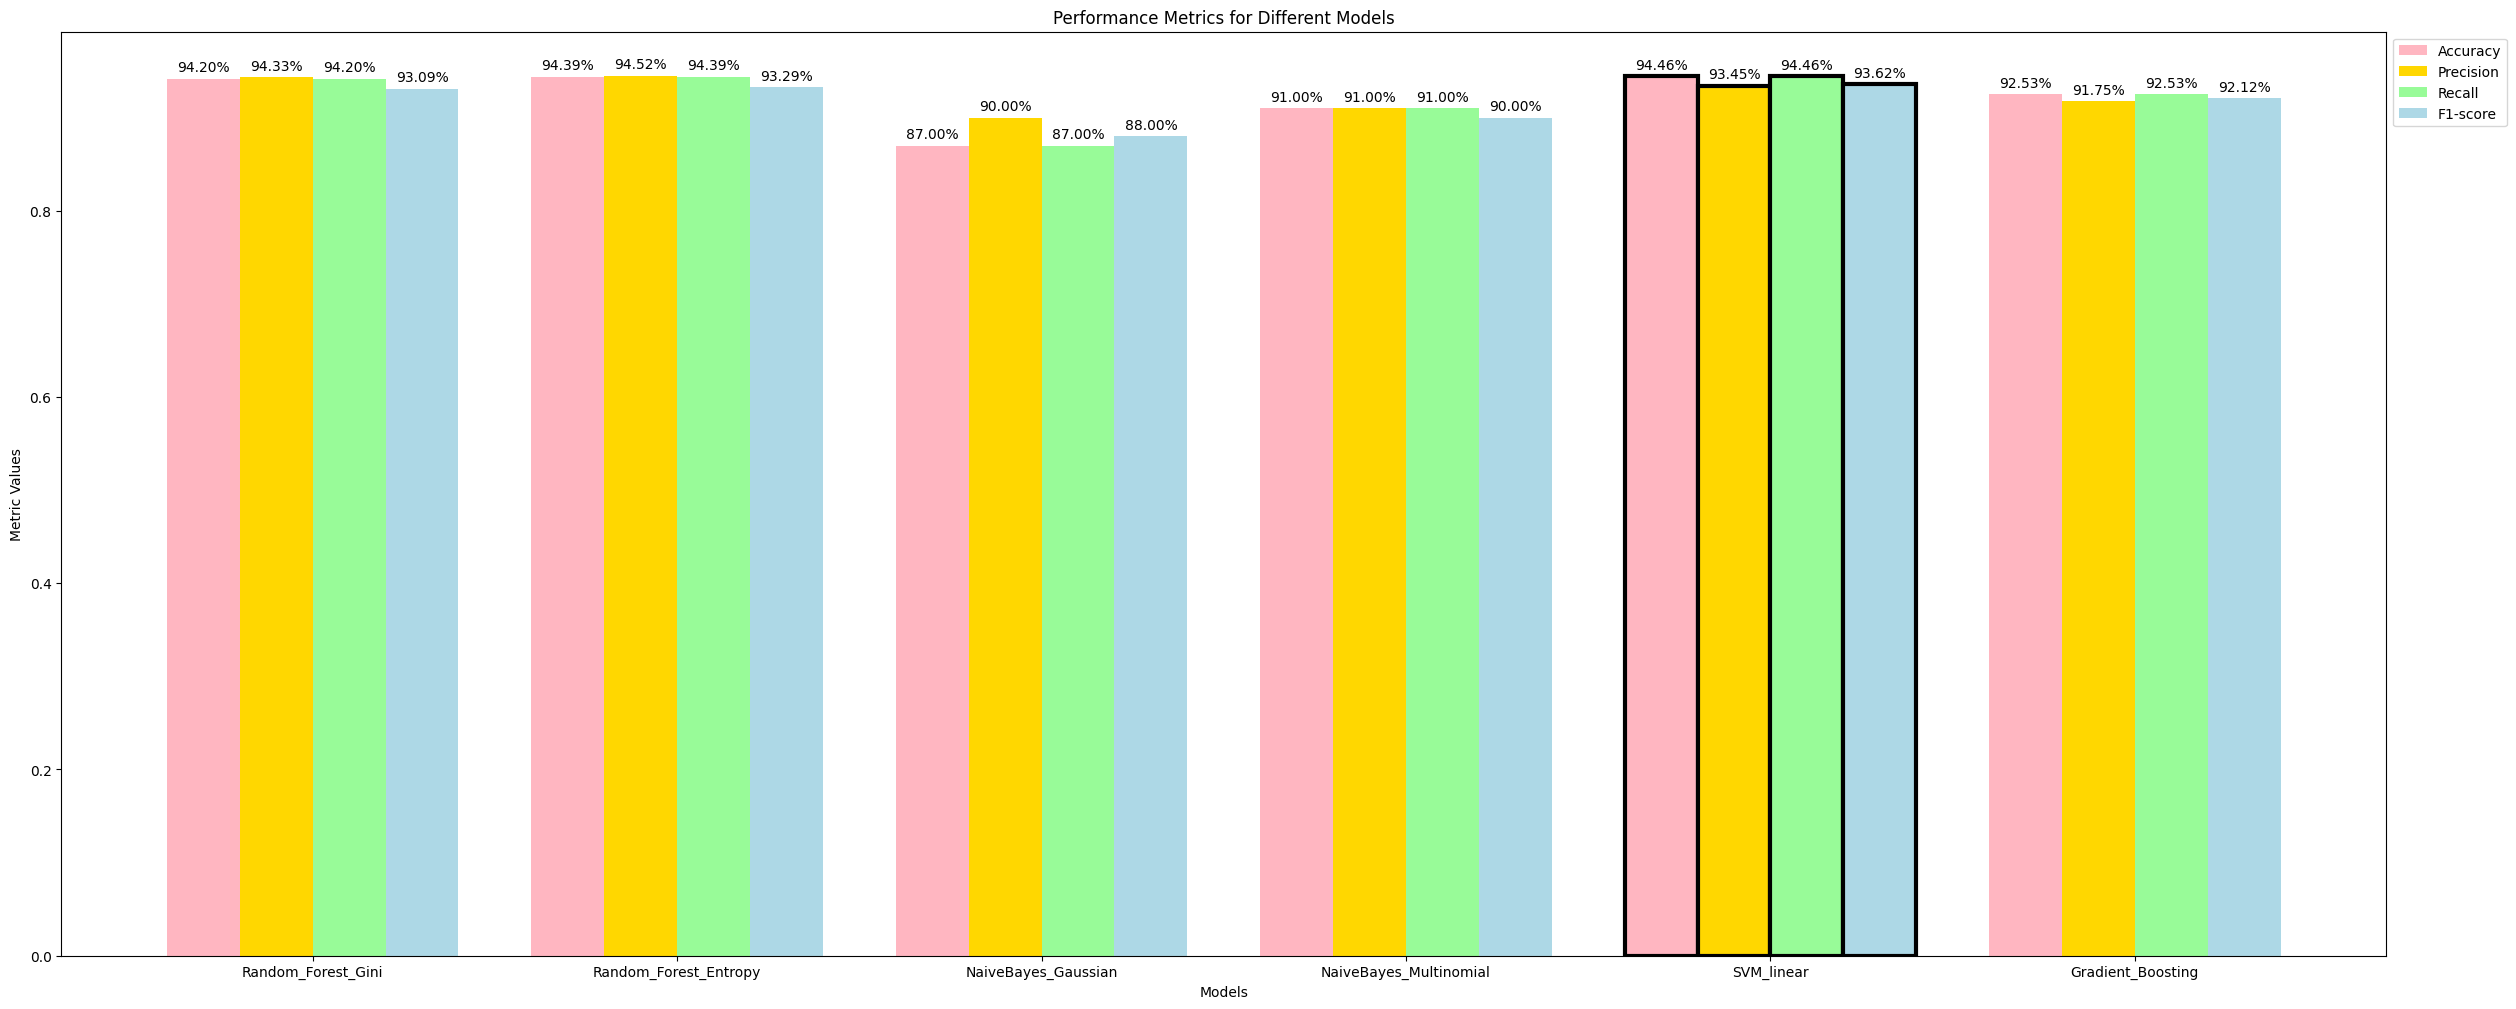

In [53]:

selected_models = ["Random_Forest_Gini", "Random_Forest_Entropy", "NaiveBayes_Gaussian", "NaiveBayes_Multinomial","SVM_linear", "Gradient_Boosting"]

accuracy_values = [0.9420103092783505, 0.9439432989690721, 0.87, 0.91, 0.9445876288659794, 0.9253]
precision_values = [0.9433016655072255, 0.9452327663641289, 0.90, 0.91, 0.9344684976776695, 0.9175]
recall_values = [0.9420103092783505, 0.9439432989690721, 0.87, 0.91, 0.9445876288659794, 0.9253]
f1_score_values = [0.9309262898978262, 0.9328613804365442, 0.88, 0.90, 0.9362397392595113, 0.9212]

# Setting up bar positions
bar_width = 0.2
model_index = npy_g26.arange(len(selected_models))

# Plotting grouped bar charts
mtplt_g26.figure(figsize=(30, 12))

border_size = 3  # Specify the desired border size

pastel_colors = ['#FFB6C1', '#FFD700', '#98FB98', '#ADD8E6']

accuracy_bar = mtplt_g26.bar(model_index, accuracy_values, bar_width, label='Accuracy', edgecolor=['black' if model == 'SVM_linear' else 'none' for model in selected_models], linewidth=border_size, color=pastel_colors[0])
precision_bar = mtplt_g26.bar(model_index + bar_width, precision_values, bar_width, label='Precision', edgecolor=['black' if model == 'SVM_linear' else 'none' for model in selected_models], linewidth=border_size,color=pastel_colors[1])
recall_bar = mtplt_g26.bar(model_index + 2 * bar_width, recall_values, bar_width, label='Recall', edgecolor=['black' if model == 'SVM_linear' else 'none' for model in selected_models], linewidth=border_size, color=pastel_colors[2])
f1_score_bar = mtplt_g26.bar(model_index + 3 * bar_width, f1_score_values, bar_width, label='F1-score', edgecolor=['black' if model == 'SVM_linear' else 'none' for model in selected_models], linewidth=border_size,color=pastel_colors[3])

# Adding labels and title to the bar chart
mtplt_g26.xlabel('Models')
mtplt_g26.ylabel('Metric Values')
mtplt_g26.title('Performance Metrics for Different Models')

mtplt_g26.xticks(model_index + 1.5 * bar_width, selected_models)
mtplt_g26.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding value to each bar
def adding_value_to_bar(bars):
    for bar in bars:
        height = bar.get_height()
        mtplt_g26.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

adding_value_to_bar(accuracy_bar)
adding_value_to_bar(precision_bar)
adding_value_to_bar(recall_bar)
adding_value_to_bar(f1_score_bar)

mtplt_g26.show()
